In [1]:
# Import Packages
from os.path import normpath, join
import numpy as np
import scipy.io as sio
import scipy as sc
import math
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv2

In [21]:
path2file = "/Users/.../"
flowFile = "Movie1_External_Flow_Field.mat"

# define filepath
fileNameFlow = normpath (join (path2file, flowFile))
# # import file into a dictionary
flowData = sio.loadmat (fileNameFlow)

# read in the matlab flow structure field(idx).{vx|vy}
flowStruct = flowData ["vfilt"]

index = 10
vx = flowStruct[0,index]['vx'] # get the fields (x components)
vy = flowStruct[0,index]['vy'] # get the fields (y components)


## Compute the principal components of the strain rate tensor ##

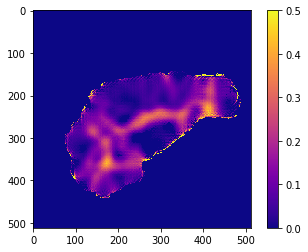

In [22]:
pc1_field = np.zeros([vx.shape[0], vx.shape[1]])
dx = 1
dy = 1
for ii in range(0,vx.shape[0]-dy, dy):
    for jj in range(0,vx.shape[0]-dx, dx):
        
        dudx = (vx[ii, jj + dx] - vx[ii, jj - dx]) / 2 * dx
        dvdy = (vy[ii + dy, jj] - vy[ii - dy, jj]) / 2 * dy
        L = np.array([[dudx/dx, dudx/dy], [dvdy/dx, dvdy/dy]])
        strainRateTensor = (L + L.T)/2
        d,V = sc.linalg.eigh(strainRateTensor)
        
        if np.abs(d[0]) > 0 and np.abs(d[1]) > 0 and np.abs(d[0]) != np.abs(d[1]):
            pc1 = np.max(np.abs(d))
                
            inds = [i for (i, val) in enumerate(np.abs(d)) if val == pc1]
            pc1_field[ii,jj] = d[inds[0]]

pc1_field[pc1_field > 0] = 0
pc1_field = np.absolute(pc1_field) 

plt.imshow(pc1_field, cmap='viridis')
plt.clim(0, 0.5)
plt.colorbar()                        